## SDSS Astroquery

This notebook can retrieve OBJID, ~images~ and other metadata by coordinates from the SDSS DR7 database (https://skyserver.sdss.org/dr7/en/tools/search/), or any other SDSS data release.

The SDSS DR7 database was used in the Galaxy Zoo 1 classification data (https://data.galaxyzoo.org/)

Unfortunately, no astroquery API exists to get files or metadata from the DESI Legacy Imaging Surveys (Jia et al 2023 used DESI DR9, DESI DR8 is available on galahad).

In [72]:
import pandas as pd
import numpy as np
import astropy.units as u
from astroquery.sdss import SDSS
from astropy import coordinates as coords
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

In [63]:
pos = coords.SkyCoord('00:00:00.41', '-10:22:25.7',unit=(u.hourangle,u.deg))
#pos = coords.SkyCoord(32.170627, -44.267273,unit=u.degree)
#0	100000_1081	32.084931	-44.311422	100000	1081	_desi_pytorch_v5_hpv2_train_all_notest_all.hdf5	0.694494	0.245271	0.060235	
xid = SDSS.query_region(pos, radius='5 arcsec',data_release=7)
print(xid.columns)
print(xid)
#100000_1081	32.084931	-44.311422	100000	1081
print(xid['objid','ra','dec'])

<TableColumns names=('ra','dec','objid','run','rerun','camcol','field')>
    ra         dec            objid        run  rerun camcol field
---------- ------------ ------------------ ---- ----- ------ -----
0.00171492 -10.37380123 587727178986356823 1729    40      3    83
      objid            ra         dec     
------------------ ---------- ------------
587727178986356823 0.00171492 -10.37380123


In [86]:
img2 = SDSS.get_images(matches=xid,show_progress=True,data_release=7)

HTTPError: HTTP Error 404: Not Found

In [69]:
img = SDSS.get_images(coordinates=pos,show_progress=True)


TypeError: Image data of dtype object cannot be converted to float

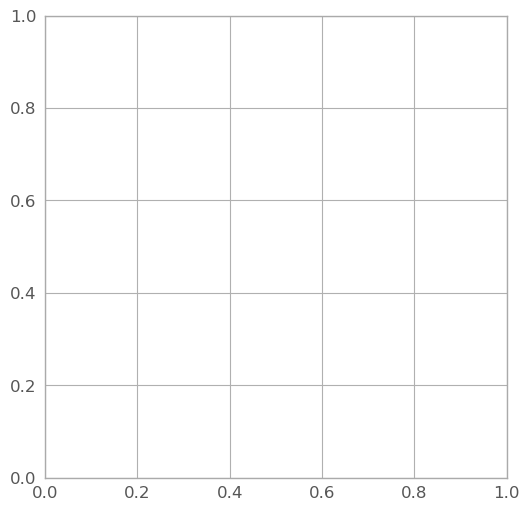

In [83]:
#image_data = fits.getdata(img[0], ext=0)
#img[0].info()
#fits.info(img[0])
plt.figure()
plt.imshow(img[0], cmap='gray')
# plt.colorbar()

In [67]:
sql = """SELECT TOP 10
p.objid,p.ra,p.dec,p.u,p.g,p.r,p.i,p.z,
p.run, p.rerun, p.camcol, p.field,
s.specobjid, s.class, s.z as redshift,
s.plate, s.mjd, s.fiberid
FROM PhotoObj AS p
JOIN SpecObj AS s ON s.bestobjid = p.objid
WHERE 
  p.u BETWEEN 0 AND 19.6
  AND g BETWEEN 0 AND 20"""
img = SDSS.query_sql(sql)
print(img)

       objid               ra               dec        ... plate  mjd  fiberid
------------------- ---------------- ----------------- ... ----- ----- -------
1237645943978524767 55.5459633197656 0.866700691142403 ...  7331 56658     835
1237645943978524759 55.5234997406845 0.938594633502336 ...  7331 56658     839
1237645943978524746 55.4806040881505  1.04139689646499 ...  7331 56658     828
1237645943978524724 55.4512525204076 0.919398621522271 ...  7331 56658     840
1237645943978524695 55.4214130935925 0.916888258456918 ...  7331 56658     838
1237645943978459256 55.3920716637872  0.85793448735556 ...  7331 56658     837
1237645943978459229 55.3569536714426 0.862802684399112 ...  7331 56658     790
1237645943978459202 55.3370195402237 0.960701932859808 ...  7331 56658     787
1237645943978459199 55.3342770649134 0.914010235826213 ...  7331 56658     798
1237645943978459165 55.3200659094693 0.883421922961921 ...  1518 52937     420


c:\ProgramData\miniconda3\envs\mphys-galaxy\Lib\site-packages\astroquery\sdss\core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
